# Final Submission Data Analysis (Bike Sharing) 

# Proyek Analisis Data: Bike-sharing-dataset
- Nama:Farid Nubaili
- Email:faridnubaili@gmail.com
- Id Dicoding:2368418 (submission)

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penyewaan sepeda dari pengguna casual dan registered tiap bulannya?
2. Bagaimana hari kerja dan akhir pekan berdampak pada penyewaan sepeda
3. Bagaimana pengaruh cuaca dan hari kerja pada penyewaan sepeda
4. Bagaimana tingkat penyewaan sepeda terhadap jam, apakah ada perbedaan pada saat hari kerja dan tidak?


## Menyaipkan semua library yang dibuthkan

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [86]:
day_df = pd.read_csv("day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [87]:
hour_df = pd.read_csv("hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assesing Data

Kesimpulan: Tidak ada data duplikat, missing value, atau innacurate value

#### Menilai tabel `day_df`

In [88]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Data lengkap, tetapi kolom 'dteday' masih bertipe object

In [89]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Nilai Max Min dari data sudah sesuai dengan file readme

In [90]:
day_df.duplicated().sum()

0

Tidak ada data duplikat

#### Menilai tabel `hour_df`

In [91]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


'dteday' masih bertipe object

In [92]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


sebaran data min max sesuai dengan readme

In [93]:
hour_df.duplicated().sum()

0

Tidak ada data duplikat

### Cleaning Data 

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [94]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

#### Membersihkan tabel `hour_df`

Memperbaiki tipe data

In [95]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Exploratory Data Analysis (EDA)

#### 1. Bagaimana tren penyewaan sepeda dari pengguna casual dan registered tiap bulannya?

In [96]:
month_trend_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum"
})
month_trend_df.index = month_trend_df.index.strftime('%Y-%m')
month_trend_df = month_trend_df.reset_index()
month_trend_df.rename(columns={'dteday':'month', 'cnt':'total_rent'}, inplace=True)
month_trend_df

,month,casual,registered,total_rent
0,2011-01,3073,35116,38189
1,2011-02,6242,41973,48215
2,2011-03,12826,51219,64045
3,2011-04,22346,72524,94870
4,2011-05,31050,104771,135821
5,2011-06,30612,112900,143512
6,2011-07,36452,104889,141341
7,2011-08,28842,107849,136691
8,2011-09,26545,100873,127418
9,2011-10,25222,98289,123511


#### 2. Bagaimana hari kerja dan akhir pekan berdampak pada penyewaan sepeda?

In [97]:
holiday_rent_df = day_df.groupby(by="holiday").agg({
    "cnt": ["max", "mean", "min", "sum"]
}).reset_index()
holiday_rent_df

holiday   cnt                            
            max         mean   min      sum
0       0  8714  4527.104225    22  3214244
1       1  7403  3735.000000  1000    78435

ketika holiday (tanggal merah), penyewaan sepi

In [98]:
working_day_rent_df = day_df.groupby(by="workingday").agg({
    "cnt": ["max", "mean", "min", "sum"]
}).reset_index()
working_day_rent_df

workingday   cnt                           
               max         mean  min      sum
0          0  8714  4330.168831  605  1000269
1          1  8362  4584.820000   22  2292410

ketika weekend (workingday=0), penyewaan sepi

#### 3. Bagaimana pengaruh cuaca dan hari kerja pada penyewaan sepeda?

In [99]:
working_day_weather_df = day_df.groupby(by=["workingday", "weathersit"]).agg({
    "cnt": ["sum"]
}).reset_index()
working_day_weather_df

,workingday,weathersit,cnt
,,,sum
0,0,1,715614
1,0,2,275578
2,0,3,9077
3,1,1,1542338
4,1,2,721280
5,1,3,28792


#### 4. Bagaimana tingkat penyewaan sepeda terhadap jam, apakah ada perbedaan pada saat hari kerja dan tidak?

In [100]:
hour_mean_trend_df = hour_df.groupby(by=["workingday", "hr"]).agg({
    "cnt": ["mean"]
}).reset_index()
hour_mean_trend_df

,workingday,hr,cnt
,,,mean
0,0,0,90.800000
1,0,1,69.508696
2,0,2,53.171053
3,0,3,25.775330
4,0,4,8.264317
5,0,5,8.689189
6,0,6,18.742358
7,0,7,43.406926
8,0,8,105.653680


## Visualization & Explanatory Analysis

#### 1. Bagaimana tren penyewaan sepeda dari pengguna casual dan registered tiap bulannya?

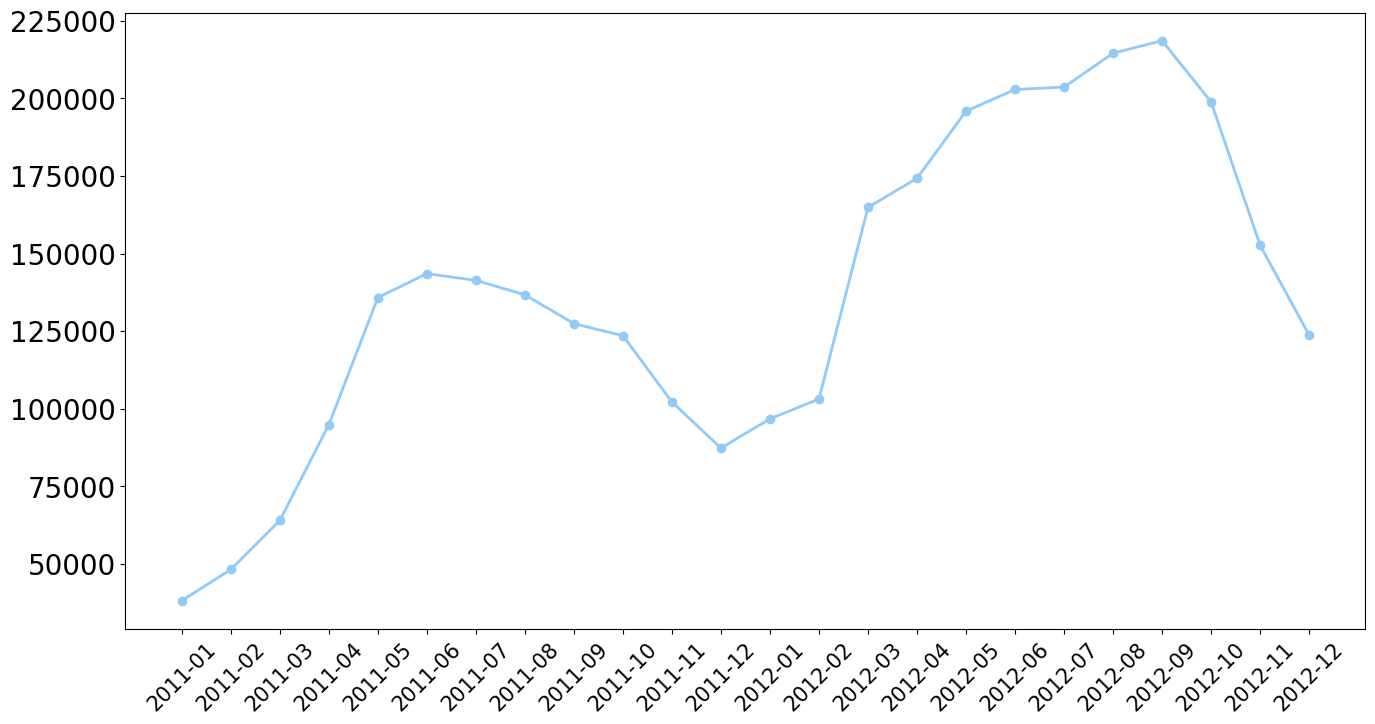

In [101]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    month_trend_df["month"],
    month_trend_df["total_rent"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=45)
plt.show()

#### 2. Bagaimana hari kerja dan akhir pekan berdampak pada penyewaan sepeda?

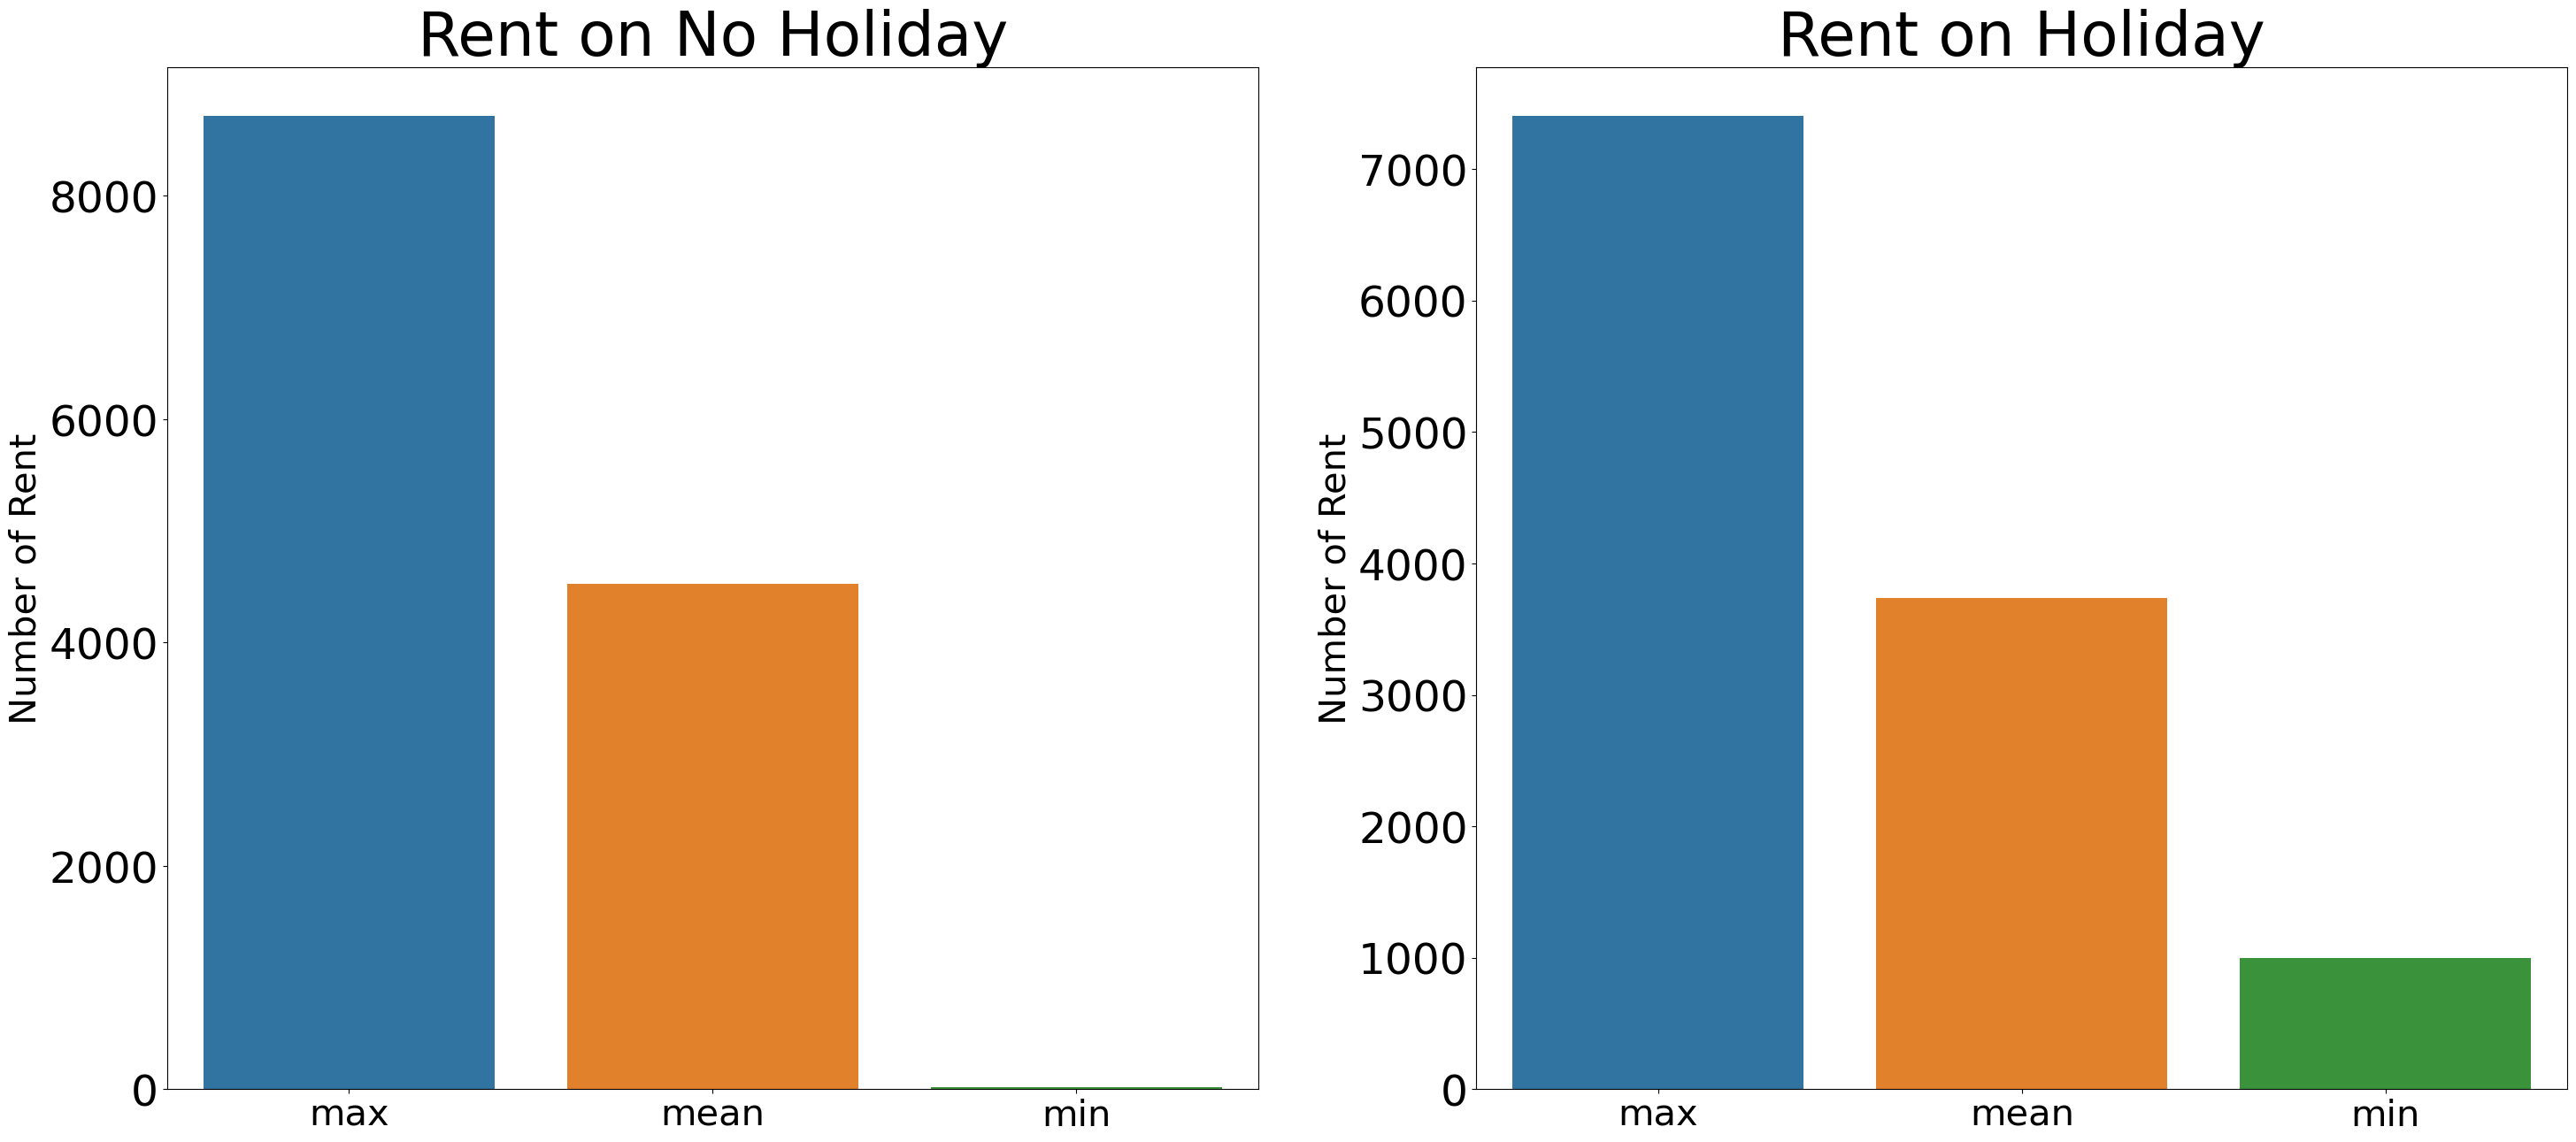

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(
    data=holiday_rent_df[holiday_rent_df['holiday'] == 0]["cnt"].drop(columns="sum", axis=1), ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel("Number of Rent", fontsize=30)
ax[0].set_title("Rent on No Holiday", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(
    data=holiday_rent_df[holiday_rent_df['holiday'] == 1]["cnt"].drop(columns="sum", axis=1), ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel("Number of Rent", fontsize=30)
ax[1].set_title("Rent on Holiday", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)
plt.show()

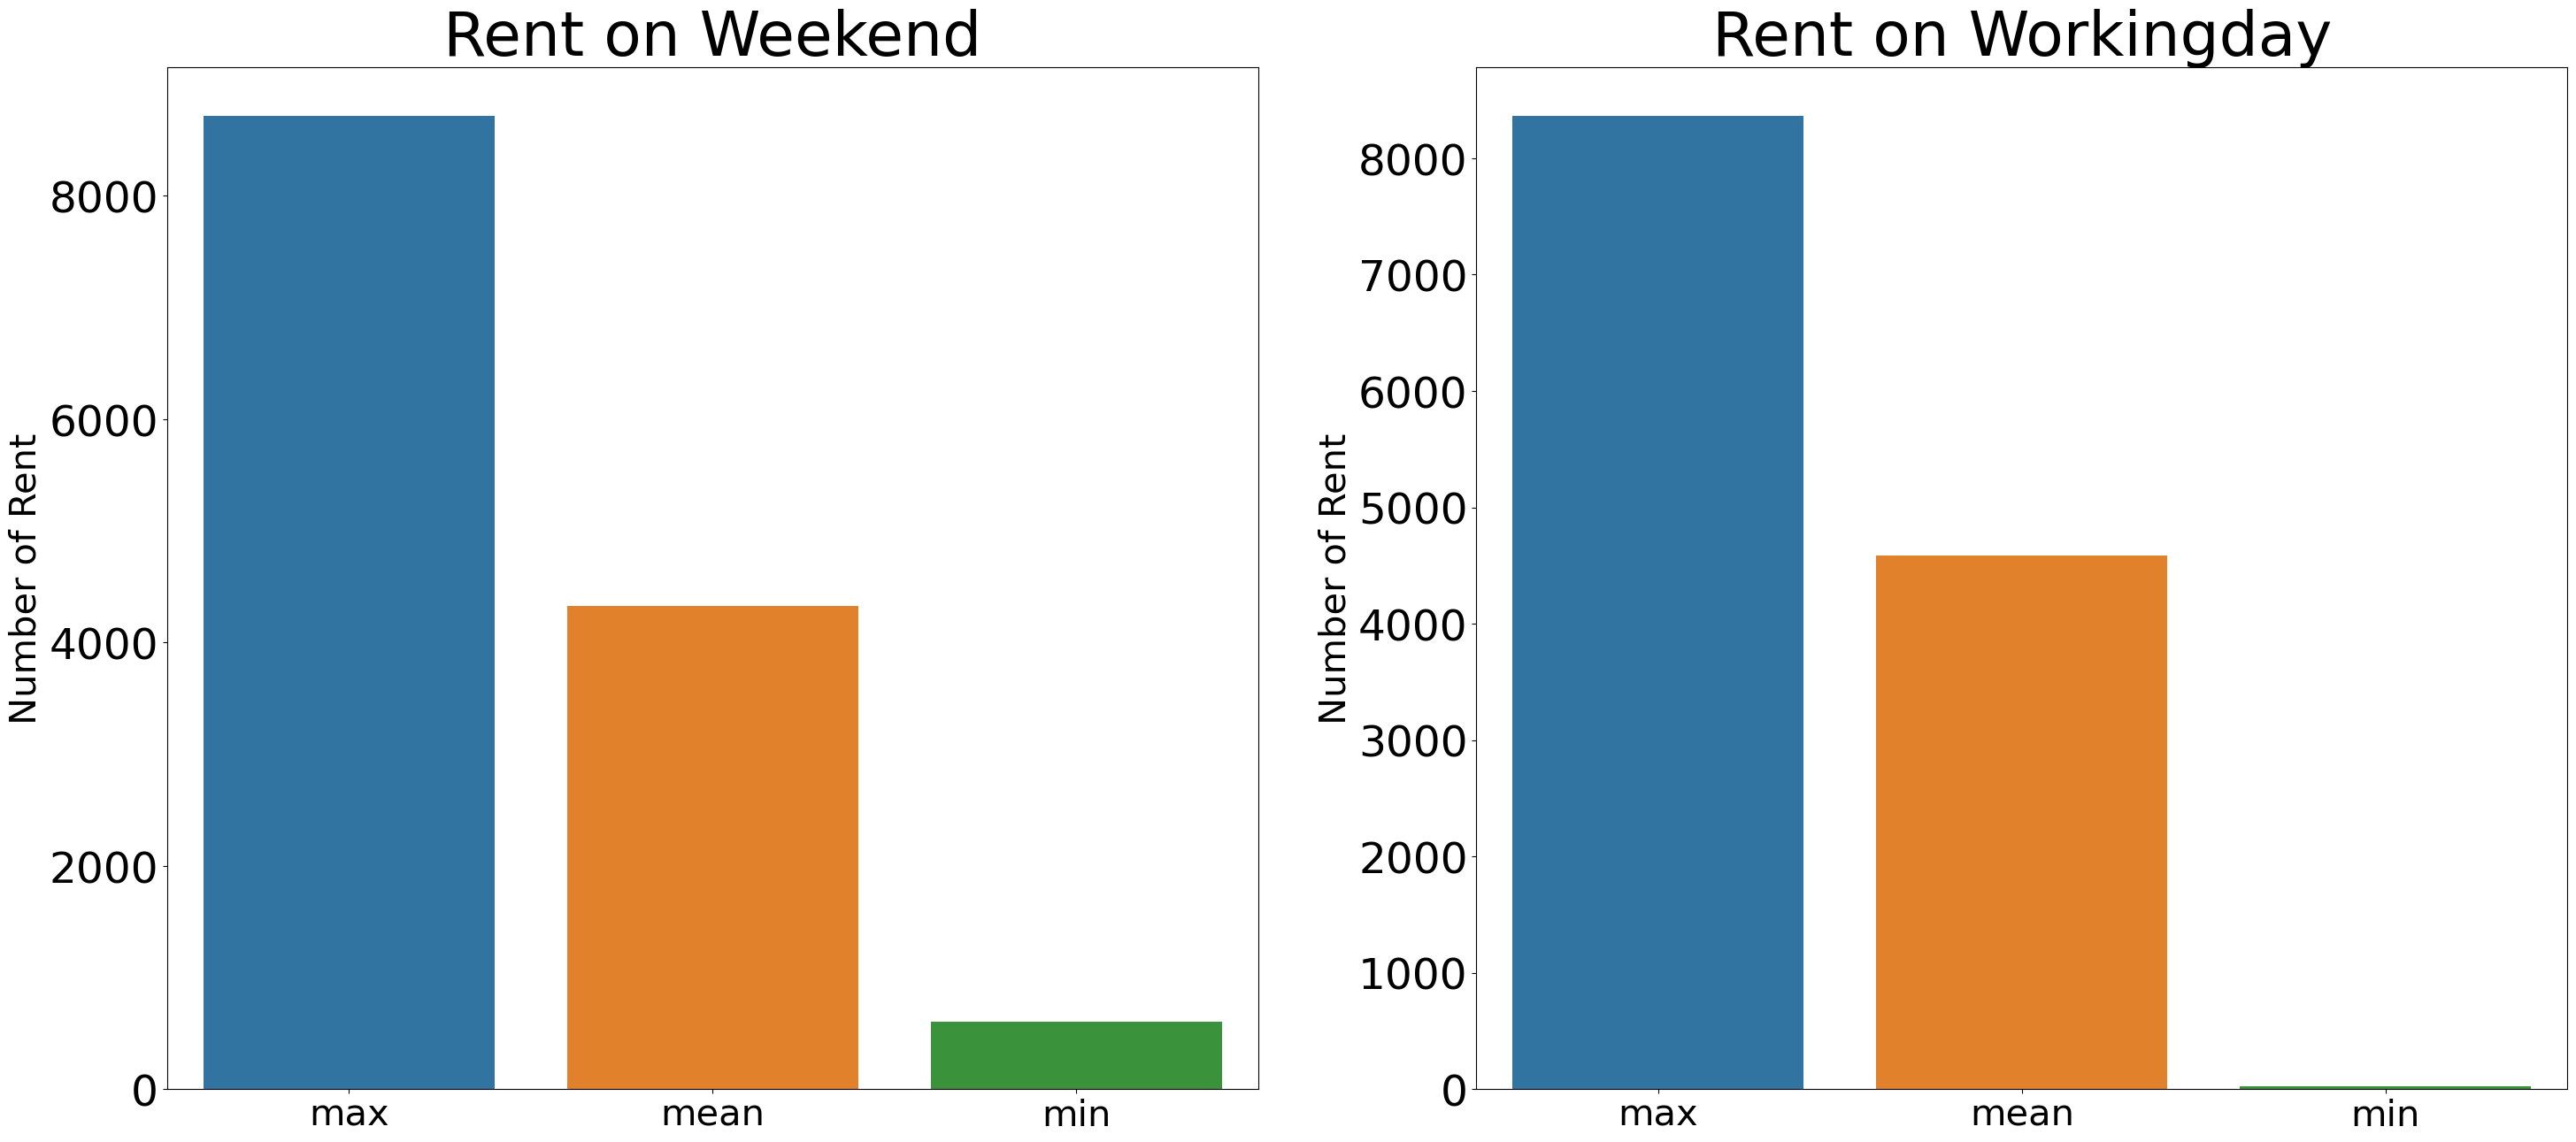

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(
    data=working_day_rent_df[working_day_rent_df['workingday'] == 0]["cnt"].drop(columns="sum", axis=1), ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel("Number of Rent", fontsize=30)
ax[0].set_title("Rent on Weekend", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(
    data=working_day_rent_df[working_day_rent_df['workingday'] == 1]["cnt"].drop(columns="sum", axis=1), ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel("Number of Rent", fontsize=30)
ax[1].set_title("Rent on Workingday", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)
plt.show(fig)

#### 3. Bagaimana pengaruh cuaca dan hari kerja pada penyewaan sepeda?

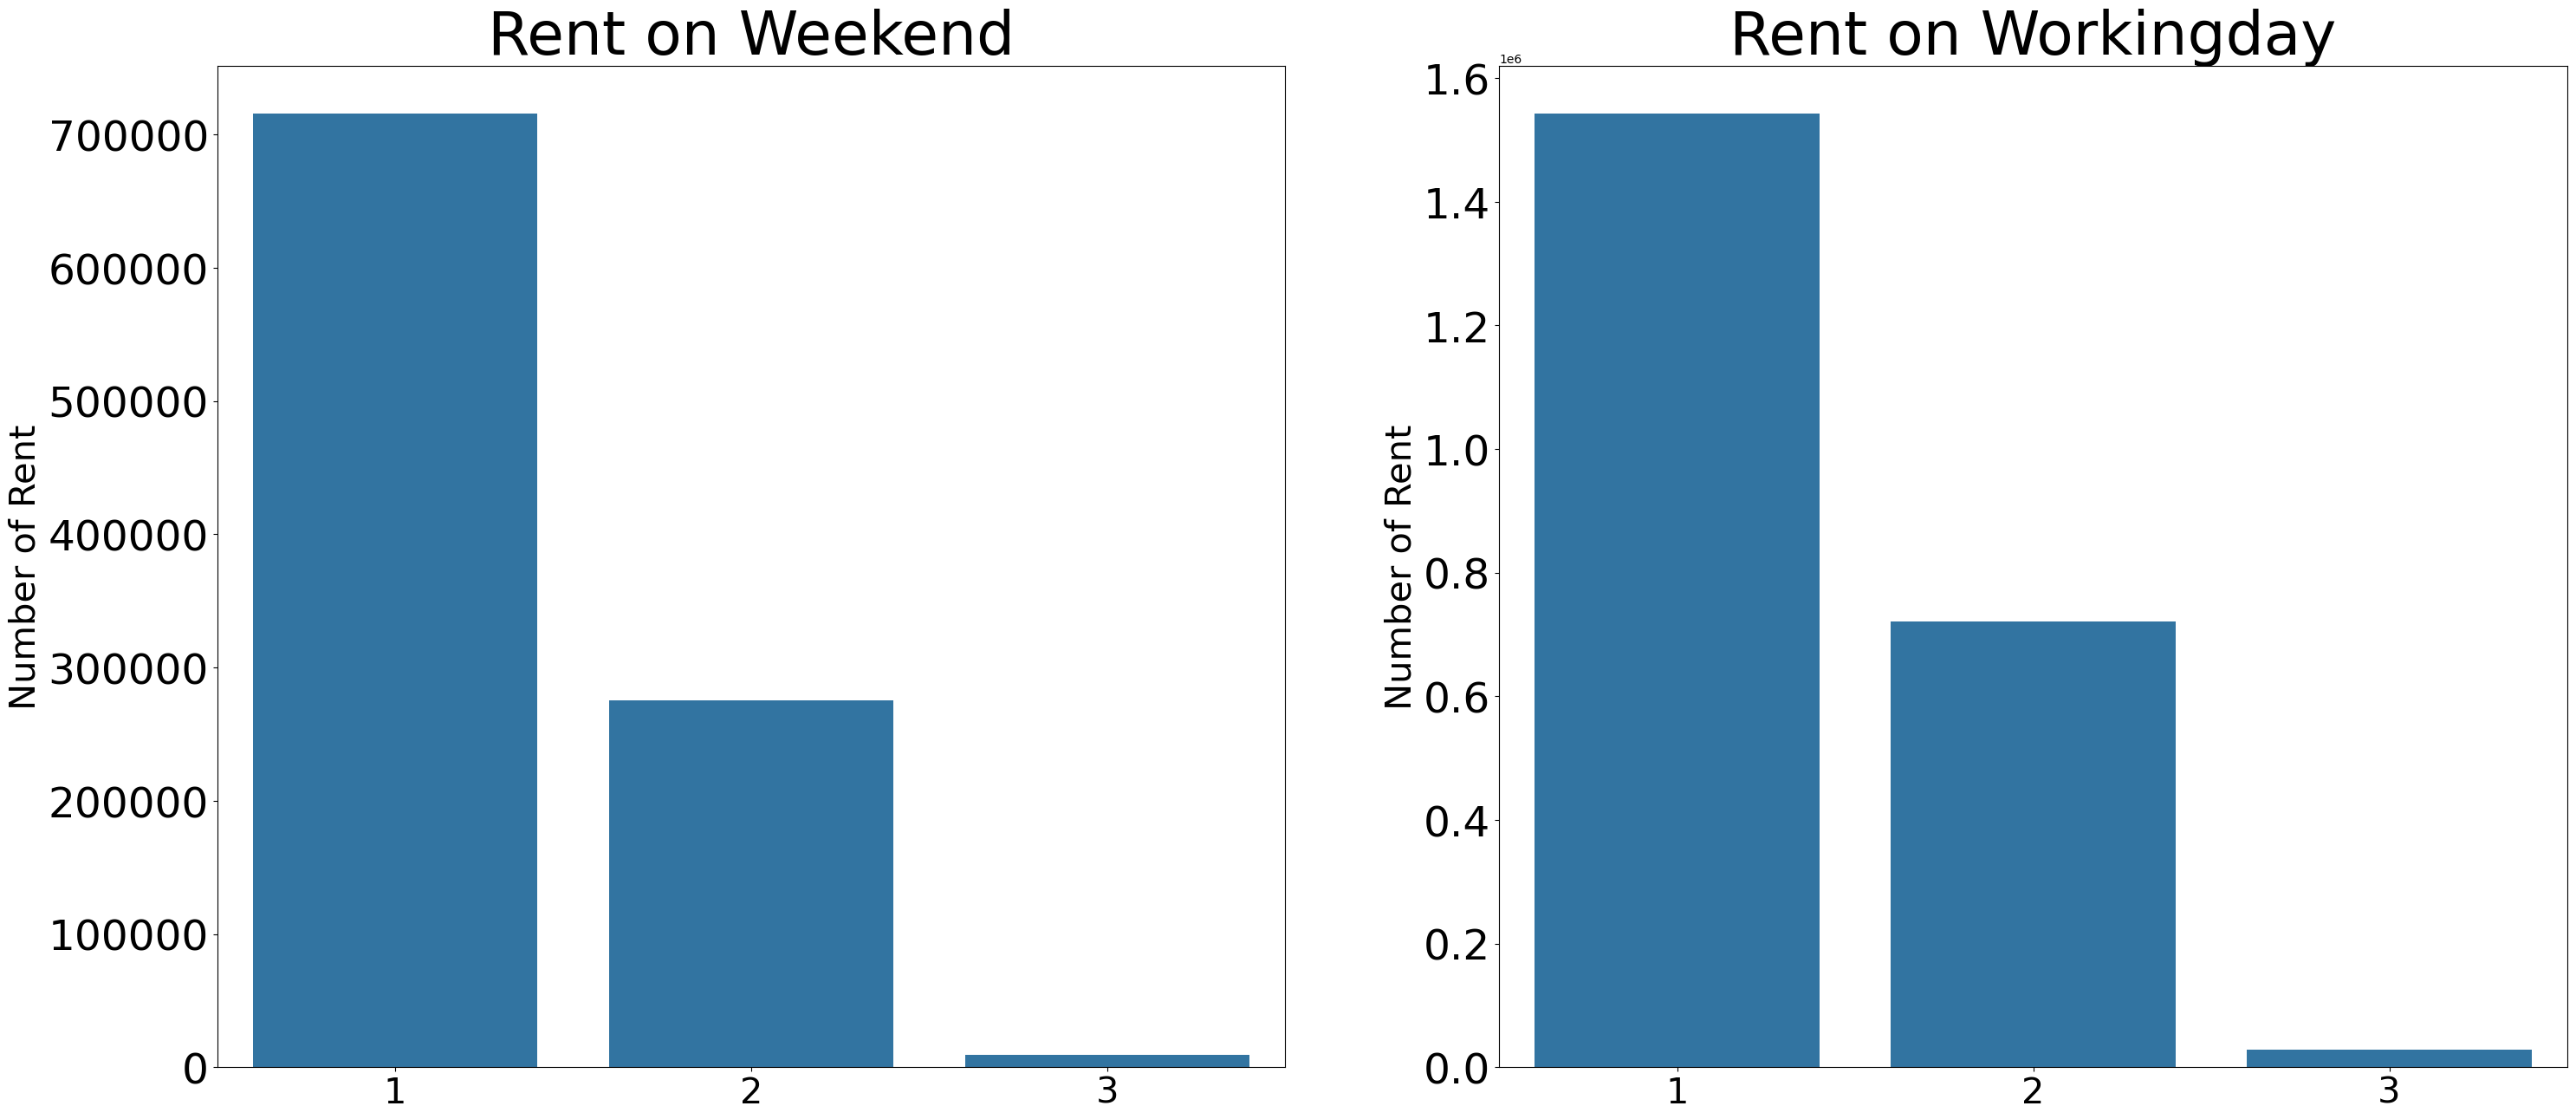

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(
    x=working_day_weather_df[working_day_weather_df['workingday'] == 0]["weathersit"], y=working_day_weather_df[working_day_weather_df['workingday'] == 0]["cnt"]["sum"], ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel("Number of Rent", fontsize=30)
ax[0].set_title("Rent on Weekend", loc="center", fontsize=50)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(
    x=working_day_weather_df[working_day_weather_df['workingday'] == 1]["weathersit"], y=working_day_weather_df[working_day_weather_df['workingday'] == 1]["cnt"]["sum"], ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel("Number of Rent", fontsize=30)
ax[1].set_title("Rent on Workingday", loc="center", fontsize=50)
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)
plt.show(fig)

#### 4. Bagaimana tingkat penyewaan sepeda terhadap jam, apakah ada perbedaan pada saat hari kerja dan tidak?

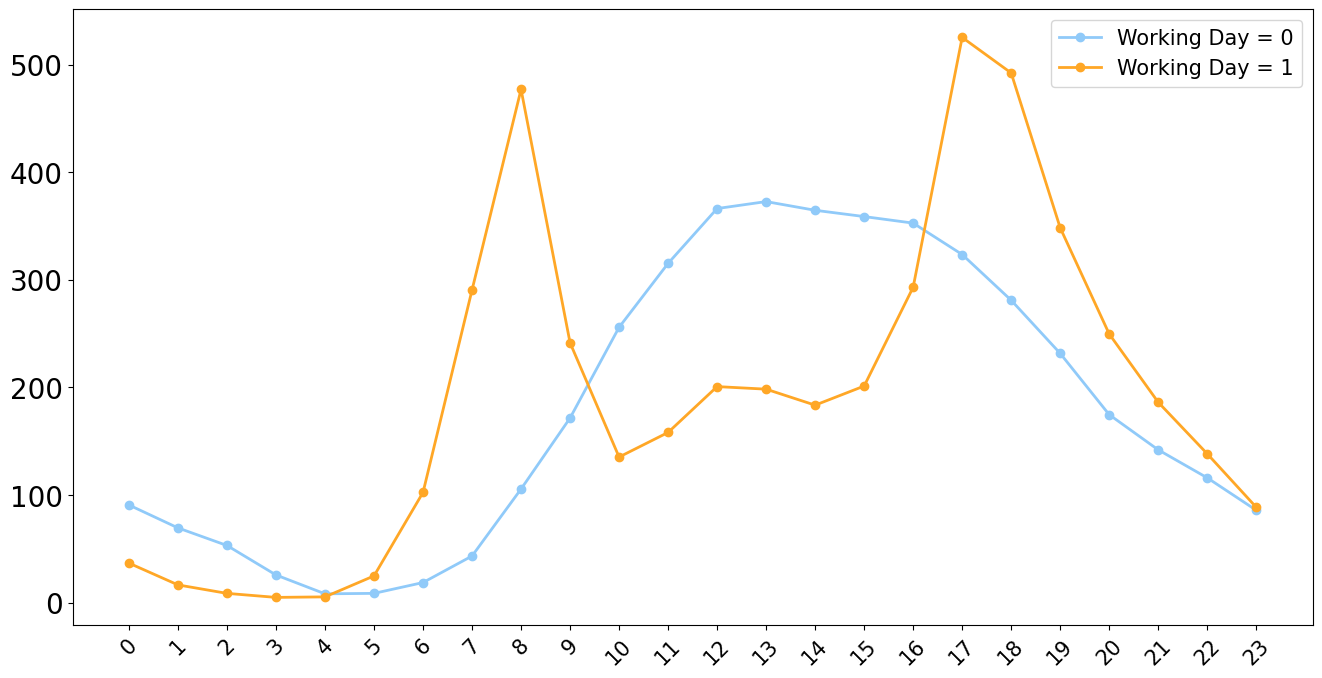

In [105]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    hour_mean_trend_df[hour_mean_trend_df['workingday'] == 0]["hr"],
    hour_mean_trend_df[hour_mean_trend_df['workingday'] == 0]["cnt"]["mean"],
    marker='o',
    linewidth=2,
    color="#90CAF9",
    label="Working Day = 0"
)


# Plot line for workingday=1
ax.plot(
    hour_mean_trend_df[hour_mean_trend_df['workingday'] == 1]["hr"],
    hour_mean_trend_df[hour_mean_trend_df['workingday'] == 1]["cnt"]["mean"],
    marker='o',
    linewidth=2,
    color="#FFA726",  # Choose a different color
    label="Working Day = 1"
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
# Set x-axis ticks to all unique hours
plt.xticks(hour_mean_trend_df["hr"].unique())
plt.xticks(rotation=45)

# Add a legend to the plot
ax.legend(loc='best', fontsize=15)
plt.show(fig)

## Conclusion
1. Tren penyewaan sepeda naik tajam pada januari-Mei 2011 dan Turun Drastis dari Agustus-Desember 2012
2. Penyewaan sepeda cenderung tinggi pada saat hari kerja dan tidak libur (no holiday) 
3. Cuaca berpengaruh pada jumlah penyewaan sepeda dengan urutan tinggi ke rendah sebagai berikut:
- cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy)
- cuaca 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
- cuaca 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
4. Penyewaan sepeda naik pada saat pukul 6-13 dan turun perlahan dari 13-23